In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

###**Предварительный анализ данных.**

Информация про игры:
- Id идентификатор заказа
- Client_id идентификатор клиента
- Order_day дата заказа
- Category_id идентификатор категории
- Category_name название категории
- Good_id идентификатор товара
- Good_name название товара
- Good_price цена товара
- Good_cnt количество этого товара в заказе
- Steam_popularity_score позиция в «ТОП 5000 популярных игр» в Steam
(позиции могут повторятся, так как топ регулярно
меняется)

Информация про клиентов:
- Gender_cd пол клиента
- Age возраст клиента
- Education_level уровень образования клиента
    - SCH начальное, среднее
    - GRD высшее
    - UGR неполное высшее
    - PGR два высших
    - ACD ученая степень
- Monthly_income_amt доход клиента

In [5]:
df = pd.read_csv("/content/drive/MyDrive/T_games_dataset.csv")
df

,id,client_id,order_day,category_id,category_name,good_id,good_name,good_price,good_cnt,gender_cd,age,education_level,city_nm,monthly_income_amt,steam_popularity_score
0,1500571355,5-25R6ZT3L9,2023-05-22,29688,Скидки,890257,The Night of the Rabbit,299.00,1.0,M,28,UGR,Москва,73552,0.0
1,1500571245,5-2P4Z5VSMF,2023-05-22,28574,Ролевые (RPG),1436296,Ni no Kuni Wrath of the White Witch Remastered,269.85,1.0,M,26,GRD,Москва,281417,0.0
2,1500573164,5-YGO64ONA,2023-05-24,30659,Казуальные игры,1179848,KeyWe - The 100th Annual Grand Ol' Telepost To...,77.00,1.0,M,30,GRD,Москва,86000,0.0
3,1500364601,5-1VA0D94LX,2022-10-23,29688,Скидки,1204914,GTFO,1675.01,1.0,M,24,GRD,Самара,56000,283.0
4,1500288143,5-1QCUV9SY7,2022-07-03,28577,Экшн,1314503,Neon White,550.00,1.0,M,38,GRD,Санкт-Петербург,32000,1676.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88694,1500300796,5-355R05SQ3,2022-07-23,28577,Экшн,848833,Apex Legends: 1000 Coins - DLC,749.00,1.0,M,18,SCH,Москва,170486,0.0
88695,1500302138,5-2IKJ0HXNU,2022-07-25,28577,Экшн,848833,Apex Legends: 1000 Coins - DLC,749.00,1.0,M,19,UGR,Самара,38000,0.0
88696,1500351510,5-8EVSLK13,2022-10-05,28577,Экшн,1406123,Dome Keeper - Deluxe Edition,561.60,1.0,M,33,SCH,Краснодар,230000,0.0
88697,1500476540,5-122LQCE7M,2023-02-13,28574,Ролевые (RPG),848895,Gothic Universe Edition,59.80,1.0,M,37,GRD,Москва,170000,0.0


Проверим данные на пропуски и аномальные значения

In [6]:
missing_data = df.isnull().sum()
print(f'Кол-во пропусков в таблице T_games_dataset:', missing_data.sum())

Кол-во пропусков в таблице T_games_dataset: 0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88699 entries, 0 to 88698
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      88699 non-null  int64  
 1   client_id               88699 non-null  object 
 2   order_day               88699 non-null  object 
 3   category_id             88699 non-null  int64  
 4   category_name           88699 non-null  object 
 5   good_id                 88699 non-null  int64  
 6   good_name               88699 non-null  object 
 7   good_price              88699 non-null  float64
 8   good_cnt                88699 non-null  float64
 9   gender_cd               88699 non-null  object 
 10  age                     88699 non-null  int64  
 11  education_level         88699 non-null  object 
 12  city_nm                 88699 non-null  object 
 13  monthly_income_amt      88699 non-null  int64  
 14  steam_popularity_score  88699 non-null

Проверим столбцы age, good_price, good_cnt, steam_popularity_score и monthly_income_amt на аномальные значения (меньше нуля)

In [8]:
anomalies = {
    "age": (df["age"] < 0).sum(),
    "good_price": (df["good_price"] < 0).sum(),
    "good_cnt": (df["good_cnt"] < 0).sum(),
    "steam_popularity_score": (df["steam_popularity_score"] < 0).sum(),
    "monthly_income_amt": (df["monthly_income_amt"] < 0).sum()
}

print('Аномалии: ')
for column, count in anomalies.items():
    print(f"{column}: {count}")

Аномалии: 
age: 0
good_price: 0
good_cnt: 0
steam_popularity_score: 0
monthly_income_amt: 11893


В столбце monthly_income_amt есть отрицательные значения. Скорее всего, это ошибка. Возьмём все значения по модулю.

In [9]:
df['monthly_income_amt'] = df['monthly_income_amt'].abs()

Значения столбца order_day надо перевести в формат даты.

In [10]:
df['order_day'] = pd.to_datetime(df['order_day'])

В стобце gender_cd могут быть только значения M и F, а в education_level значения SCH, GRD, UGR, PGR, ACD. Проверим это.

In [11]:
valid_gender = {'M', 'F'}
valid_education = {'SCH', 'GRD', 'UGR', 'PGR', 'ACD'}

anomalies = {
    'gender_cd': (~df['gender_cd'].isin(valid_gender)).sum(),
    'education_level': (~df['education_level'].isin(valid_education)).sum()
}

print('Количество некорректных записей:')
for column, count in anomalies.items():
    print(f"{column}: {count}")

Количество некорректных записей:
gender_cd: 0
education_level: 0


###**Решение задачи 1**

Исследуйте портреты покупателей видеоигр и ответьте на вопросы

#####**Как игроки отличаются от других клиентов Т-Банка?**

В вопросе наверное подразумевается характеристика людей, которые делают заказ. Можно посмотреть на демографические особенности клиентов (gender_cd, age, education_level, city_nm).

In [12]:
df_demografic = df.loc[:, ['client_id', 'gender_cd', 'age', 'education_level', 'city_nm']].drop_duplicates(subset=['client_id'])

In [13]:
percentage_male = (df_demografic['gender_cd'] == 'M').mean() * 100
percentage_female = (df_demografic['gender_cd'] == 'F').mean() * 100
print(f'Процент мужчин: {percentage_male:.1f}%')
print(f'Процент женщин: {percentage_female:.1f}%')

Процент мужчин: 89.0%
Процент женщин: 11.0%


Видно, что количество мужчин значительно превышает количество женщин, что в общем и целом логично. Тогда для формирования портрета игрока в этом вопросе будем смотреть только на мужской пол.

Далее выясним средний возраст клиентов.

In [14]:
mean_age = df_demografic.loc[df_demografic['gender_cd'] == 'M', 'age'].mean()
print(f'Средний возраст мужчин: {mean_age:.1f} лет')

Средний возраст мужчин: 25.5 лет


Теперь посмотрим на самый популярный уровень образования и город.

In [15]:
common_education = df_demografic.loc[df_demografic['gender_cd'] == 'M', 'education_level'].mode().values[0]
print(f'Самый популярный уровень образования: {common_education}')
common_city = df_demografic.loc[df_demografic['gender_cd'] == 'M', 'city_nm'].mode().values[0]
print(f'Самый частый город: {common_city}')

Самый популярный уровень образования: GRD
Самый частый город: Москва


Итак, портрет человека, который покупает игры в Тинькофф Городе: мужчина, примерно 26 лет, имеет высшее образование (GRD) и проживает в городе Москва.

#####**Чем отличаются заядлые покупатели игр?**

Сперва следует определиться с критерием "заядлости". Понятно, что это люди, которые заказывают больше всех игр. Но надо понять с какого количества заказов человек считается заядлым покупателей.

In [16]:
df_gamers = df.groupby('client_id')['good_cnt'].sum().sort_values(ascending=False).reset_index()
df_gamers.describe()

,good_cnt
count,41298.000000
mean,2.147780
std,4.008222
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,279.000000


Значением третьего процентиля является 2, значит всё что больше него уже является "заядлым".

In [17]:
hardcore_gamers = df_gamers[df_gamers['good_cnt'] > 2]

Можно сравнить доход заядлых покупателей с остальными.

In [18]:
is_hardcore = df['client_id'].isin(hardcore_gamers['client_id'])
mean_income = df.groupby(is_hardcore)['monthly_income_amt'].mean()
mean_income.index = ['Остальные', 'Заядлые покупатели']
print(mean_income)

Остальные             107861.533803
Заядлые покупатели    112150.386597
Name: monthly_income_amt, dtype: float64


Средний доход заядлых покупателей выше, чем у остальных. Люди с большим располагаемым доходом могут позволить себе чаще покупать игры.

Нулевая гипотеза (H₀): Средний возраст заядлых покупателей не отличается от среднего возраста остальных клиентов.
Альтернативная гипотеза (H₁): Средний возраст заядлых покупателей выше, чем у остальных.

In [19]:
age_hardcore = df.loc[is_hardcore, 'age']
age_others = df.loc[~is_hardcore, 'age']

Посмотрим на распределение данных. Здесь мы строим гистограмму, потому что при большом объёме данных довольно сложно проводить статистические тесты - они могут выявить даже небольшие отклонения от нулевой гипотезы.

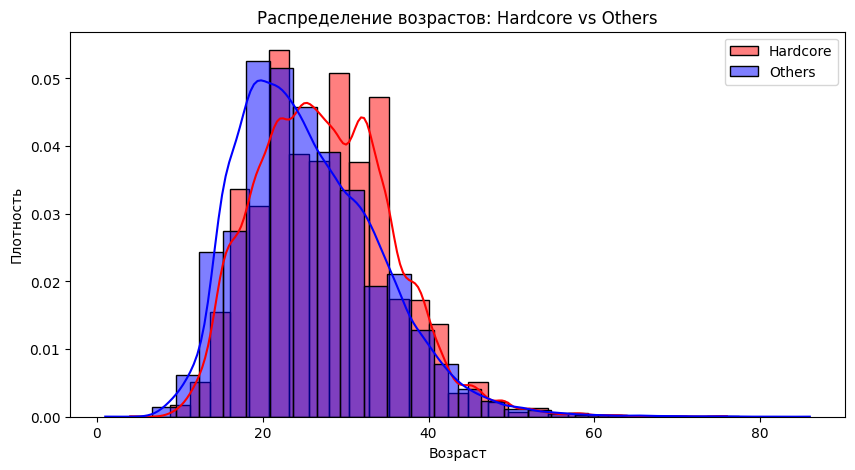

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(age_hardcore, kde=True, color='red', label='Hardcore', stat='density', bins=30, alpha=0.5)
sns.histplot(age_others, kde=True, color='blue', label='Others', stat='density', bins=30, alpha=0.5)
plt.title('Распределение возрастов: Hardcore vs Others')
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.legend()
plt.show()

Оба распределения не относятся к нормальным. Есть значительные смещения, например, правосторонняя ассиметрия для Others и длинные хвосты. Поэтому будем проводить тест T-критерий Уэлча, он устойчив к большим выборкам благодаря ЦПТ.

In [21]:
from scipy.stats import ttest_ind

stat, p_value = ttest_ind(age_hardcore, age_others, equal_var=False)

print(f"t-statistic: {stat:.3f}")
print(f"p-value: {p_value:.4f}")

mean_diff = age_hardcore.mean() - age_others.mean()
print(f"Разница средних возрастов: {mean_diff:.2f} года")

t-statistic: 34.741
p-value: 0.0000
Разница средних возрастов: 1.94 года


Средний возраст заядлых покупателей статистически значимо выше, чем у остальных клиентов. Разница средних составляет 1,94 года, что подверждает альтернативную гипотезу о большей возрастной группе среди активных покупателей.

Альтернативная гипотеза подтвердилась. Соответственно, чем старше человек, тем выше у него доход. Как следствие он может тратить больше денег на хобби.

#####**Нацелены ли игры на разные аудитории? То есть, можно ли выделить несколько групп игр, покупатели которых сильно отличаются друг от друга?**

Мы не будем использовать кластерный анализ данных. В задании указано, что оно решается без использования инструментов ML.

Для посмотрим значения разных показателей по категориям игр. Один человек может покупать игры разных жанров, значит повторы стоит учитывать.

In [22]:
genre_stats = df.groupby('category_name').agg(
    client_count=('client_id', 'count'),
    age_mean=('age', 'mean'),
    income_mean=('monthly_income_amt', 'mean'),
    male_part=('gender_cd', lambda x: (x == 'M').mean() * 100),
    female_part=('gender_cd', lambda x: (x == 'F').mean() * 100)
).reset_index()

print(genre_stats.sort_values('age_mean', ascending=False))

              category_name  client_count   age_mean    income_mean  \
6                 Для детей           106  29.981132  118379.301887   
12                  Новинки           429  29.344988  116338.048951   
14               Предзаказы            43  29.232558  147424.930233   
11  Классика от Deep Silver           176  29.136364  111061.590909   
2             Xbox подписка           284  29.031690  116790.080986   
20                Стратегии         10590  28.745231  119854.356657   
7                    Другое           386  28.290155  123897.116580   
16            Ролевые (RPG)          8351  28.141779  110436.601724   
19                    Спорт           357  27.616246  101727.378151   
17               Симуляторы          8116  27.495564  115905.814317   
10             Карты оплаты            54  27.055556   94855.981481   
18                   Скидки          7681  26.598880  104954.508918   
15              Приключения         11083  26.398177  107196.801137   
3     

In [23]:
genre_stats.describe()

,client_count,age_mean,income_mean,male_part,female_part
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,3547.960000,26.735470,110941.949182,89.883006,10.116994
std,4742.537071,1.865955,10962.318871,5.073111,5.073111
min,20.000000,23.272936,94855.981481,73.584906,0.000000
25%,357.000000,25.259459,104234.179227,88.380282,7.283091
50%,684.000000,26.398177,109424.030328,91.378278,8.621722
75%,7681.000000,28.290155,116338.048951,92.716909,11.619718
max,17014.000000,29.981132,147424.930233,100.000000,26.415094


In [24]:
new_train = pd.get_dummies(genre_stats, columns=['category_name'])
new_train.corr(numeric_only=True).head(5)

,client_count,age_mean,income_mean,male_part,female_part,category_name_Anime,category_name_VR,category_name_Xbox подписка,category_name_Аркады,category_name_Бестселлеры,...,category_name_Приключения,category_name_Ролевые (RPG),category_name_Симуляторы,category_name_Скидки,category_name_Спорт,category_name_Стратегии,category_name_Файтинги,category_name_Хоррор,category_name_Шутеры,category_name_Экшн
client_count,1.000000,-0.056499,-0.053151,-0.085609,0.085609,-0.133454,-0.136704,-0.143381,-0.131169,0.010281,...,0.331004,0.210991,0.200668,0.181559,-0.140175,0.309347,-0.125810,-0.084078,-0.066462,0.591545
age_mean,-0.056499,1.000000,0.560144,-0.069728,0.069728,-0.206900,-0.386591,0.256372,-0.057083,-0.153439,...,-0.037659,0.157014,0.084864,-0.015250,0.098338,0.224389,-0.279461,-0.180645,-0.164796,-0.091945
income_mean,-0.053151,0.560144,1.000000,0.009361,-0.009361,-0.187433,-0.250084,0.111141,-0.173555,0.083103,...,-0.071175,-0.009604,0.094336,-0.113788,-0.175118,0.169376,-0.005862,-0.090394,-0.203716,-0.028847
male_part,-0.085609,-0.069728,0.009361,1.000000,-1.000000,-0.003248,-0.093152,-0.061711,0.042802,0.091888,...,-0.197766,0.061405,-0.045997,-0.025617,0.070372,0.096709,0.163306,-0.197762,0.128911,0.083587
female_part,0.085609,0.069728,-0.009361,-1.000000,1.000000,0.003248,0.093152,0.061711,-0.042802,-0.091888,...,0.197766,-0.061405,0.045997,0.025617,-0.070372,-0.096709,-0.163306,0.197762,-0.128911,-0.083587


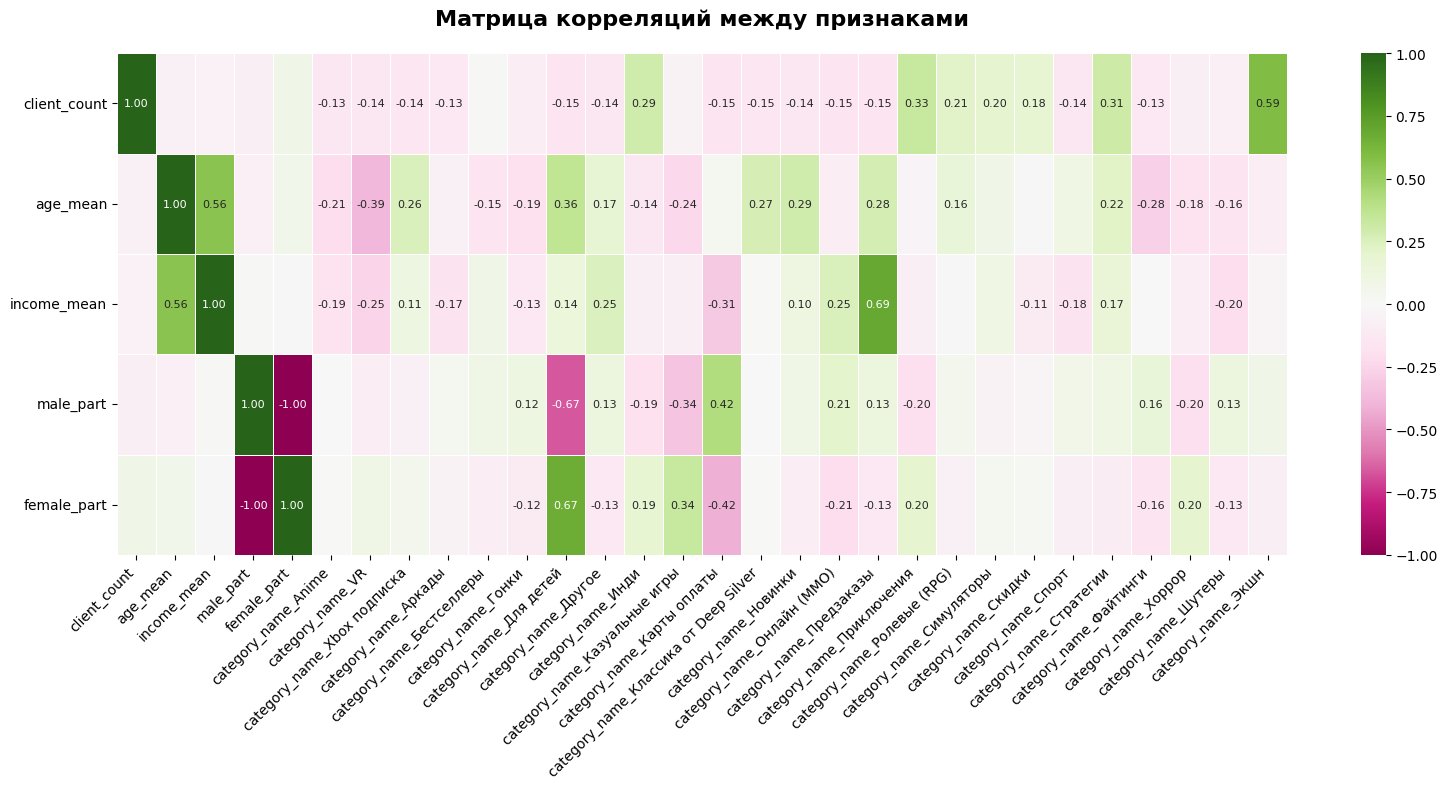

In [25]:
new_train = pd.get_dummies(genre_stats, columns=['category_name'])
corr_matrix = new_train.corr(numeric_only=True)

plt.figure(figsize=(16, 8), dpi=100)
corr_subset = corr_matrix.iloc[:5, :]
labels = corr_subset.applymap(lambda a: f"{a:.2f}" if abs(a) >= 0.1 else "")
labels_subset = labels.iloc[:5, :]
sns.heatmap(corr_subset, cmap='PiYG', center=0, annot=labels_subset, fmt="", linewidths=0.5, annot_kws={"size": 8})
plt.title('Матрица корреляций между признаками', fontsize=16, pad=20, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Значения умеренной корреляции (0,3 <= and < 0,5):

  - category_name_VR и age_mean ("-")
  - category_name_Для детей и age_mean ("+")
  - category_name_Казуальные игры и male_part ("-") и female_part ("+")
  - category_name_Карты оплаты и income_mean ("-")
  - category_name_Карты оплаты и male_part ("+") и female_part ("-")

Значения средней корреляции (0,5 <= and < 0,7):

- category_name_Для детей и male_part ("-") и female_part ("+")
- category_name_Предзаказы и income_mean ("+")


Давайте будем пытаться разделять данные. Будем смотреть по значениям корреляции больше 0,1. Косым шрифтом выделены категории, которые лучше подходят для других групп.

У нас есть много корреляций с полом. Тогда сперва разобьём на две группы: мужские и женские.

**1я группа / мужские**
- *Гонки*
- *Другое*
- Карты оплаты
- Онлайн (MMO)
- *Предзаказы*
- Файтинги
- *Шутеры*

**2я группа / женские**
- Для детей
- Казуальные игры
- *Инди*
- *Приключения*
- Хоррор

Попробуем теперь сегментировать по возрасту и доходу. Как мы выяснили ранее, доход зависит от возраста, более того у них средняя корреляция (0,56) и прямая зависимость.

**1я группа / высокий доход, взрослая аудитория**

- Xbox подписка
- *Для детей (female_part = 0,67 > age_mean = 0,36)*
- Другое (male_part = 0,13 < income_mean = 0,25)
- Новинки
- Предзаказы (male_part = 0,13 < income_mean = 0,69)
- *Стратегии*

**2я группа / низкий, молодая аудитория**

- Anime
- VR
- Гонки (male_part = 0,12 < age_mean = |0,19|)
- Шутеры (male_part = 0,13 < income_mean = |0,20|)

Рассмотрим разделение по популярности среди покупателей.

**1я группа / популярно**

- Инди (female_part = 0,19 < client_count = 0,29)
- Приключения (female_part = 0,2 < client_count = 0,33)
- Ролевые (RPG)
- Симуляторы
- Скидки
- Стратегии (age_mean = 0,22 < client_count = 0,31)
- Экшн

**2я группа / непопулярно**

-	*Anime (age_mean = |0,21| > client_count = 0,13)*
-	*VR (age_mean = |-0,39| > client_count = 0,14)*
-	*Xbox подписка (age_mean = 0,26 > client_count = |-0,14|)*
-	Аркады
-	*Для детей (female_part = 0,67 > client_count = |-0,15|)*
-	*Другое (income_mean = 0,25 > client_count = |-0,14|)*
-	*Карты оплаты (male_part = 0,42 > client_count = |0,15|)*
-	Классика от Deep Silver
-	*Новинки (age_mean = 0,29 > client_count = |0,14|)*
-	*Онлайн (MMO) (income_mean = 0,25 > client_count = |0,15|)*
-	*Предзаказы (income_mean = 0,69 > client_count = |-0,15|)*
-	Спорт
-	*Файтинги (age_mean = |-0,28| > client_count = |-0.13|)*

#####**Итого:**



1.   **Взрослая аудитории с высоким доходом (премиум-сегмент)**
    - Xbox подписка
    - Другое
    - Новинки
    - Предзаказы
2.   **Молодая аудитории с низким доходом (бюджетный-сегмент)**
    - Anime
    - VR
    - Гонки
    - Шутеры
    - Бестселлеры
3.  **Женская аудитория**
    - Для детей
    - Казуальные игры
    - Хоррор
4. **Мужская аудитория**
    - Карты оплаты
    - Онлайн (ММО)
    - Файтинги
5. **Массовые жанры**
    - Инди
    - Приключения
    - Ролевые (RPG)
    - Симуляторы
    - Скидки
    - Стратегии   
    - Экшн
6. **Нишевые продукты**
    - Аркады
    - Классика от Deep Silver
    - Спорт




Единственный жанр, который по итогам анализа не попал ни в одну из групп - Бестселлеры. Его можно отнести к бюджметному сегменту.

Какие выводы можно сделать по сегментации? С помошью экспертной оценки было установлено, что в целом разделение по группам сделано верно, но наибольшее подозрение вызывают Стратегии. Стратегии требуют глубокого погружения и обычно имеют узкую аудиторию, поэтому их странно относить к массовым жанрам. Во всех остальных аспектах сегментация корректна.

#####**Справедливы ли выводы предыдущих пунктов на всем представленном временном промежутке?**

Наверняка все предущие выводы сильно будут зависеть от временного промежутка. Давайте рассмотрим предыдущие пункты во времени. Данные представлены с 01-01-2022 по 29-10-2023.

Для первого пункта построим несколько графиков, чтобы было видно как менялись показатели портрета покупателя.

In [26]:
df['year_month'] = df['order_day'].dt.to_period('M')
df_demografic_time = df.loc[:, ['client_id', 'gender_cd', 'age', 'education_level', 'city_nm', 'year_month', 'order_day']].drop_duplicates(subset=['client_id'])

Расчитаем показатели для графиков. Как и ранее будем смотреть средний возраст, уровень образования и город только для людей мужского пола.

In [27]:
gender_dist = df_demografic_time.groupby('year_month')['gender_cd'].value_counts(normalize=True).unstack() * 100
male_age = df_demografic_time[df_demografic_time['gender_cd'] == 'M'].groupby('year_month')['age'].mean()

male_education = (df_demografic_time[df_demografic_time['gender_cd'] == 'M'].groupby('year_month')['education_level'].agg(lambda x: x.mode()[0]))

male_city = (df_demografic_time[df_demografic_time['gender_cd'] == 'M'].groupby('year_month')['city_nm'].agg(lambda x: x.mode()[0]))

Создадим графики.

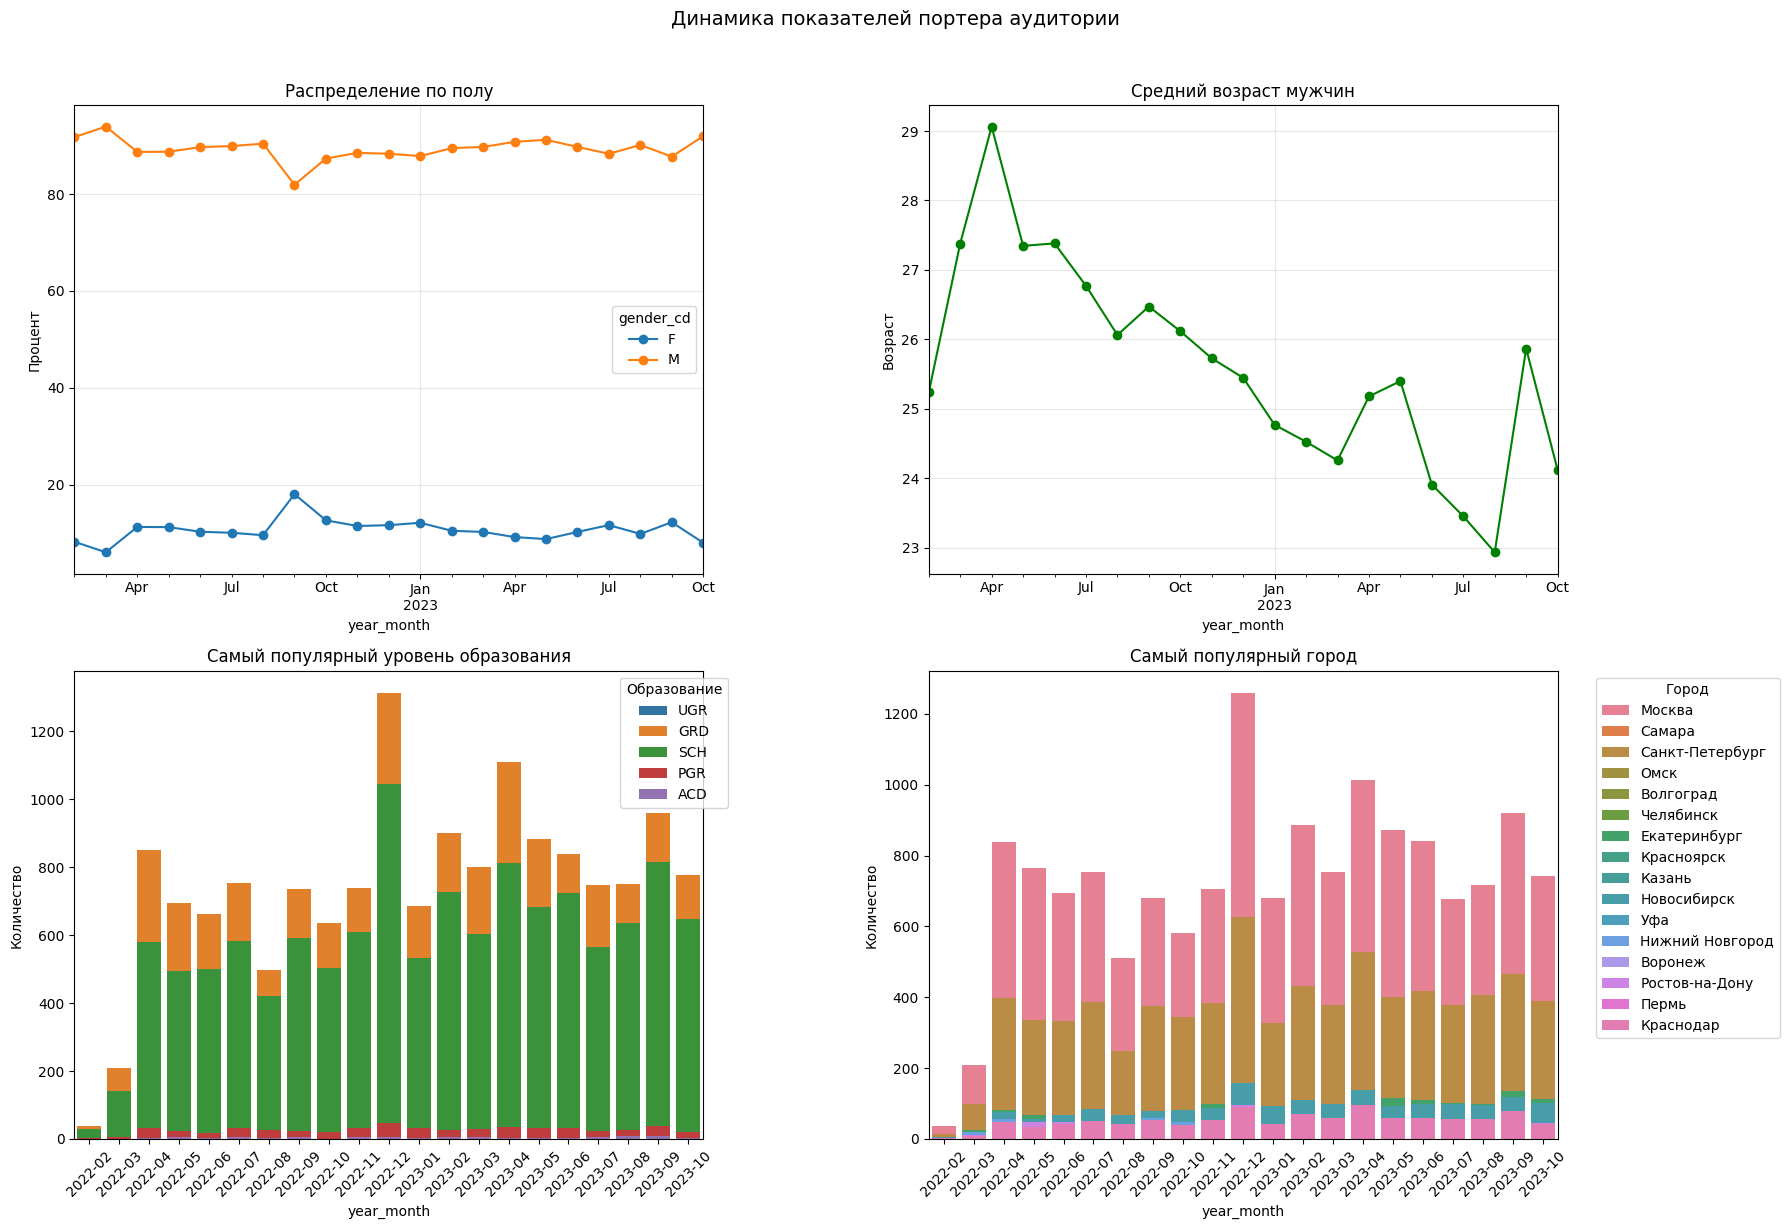

In [28]:
plt.figure(figsize=(18, 12))
plt.suptitle('Динамика показателей портера аудитории', y=1.02, fontsize=14)

plt.subplot(2, 2, 1)
gender_dist.plot(kind='line', ax=plt.gca(), marker='o')
plt.title('Распределение по полу')
plt.ylabel('Процент')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 2)
male_age.plot(kind='line', color='green', marker='o')
plt.title('Средний возраст мужчин')
plt.ylabel('Возраст')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 3)
sns.countplot(data=df_demografic_time[df_demografic_time['gender_cd'] == 'M'], x='year_month', hue='education_level', order=male_education.index.unique(), dodge=False)
plt.title('Самый популярный уровень образования')
plt.xticks(rotation=45)
plt.ylabel('Количество')
plt.legend(title='Образование', bbox_to_anchor=(1.05, 1))

plt.subplot(2, 2, 4)
sns.countplot(data=df_demografic_time[df_demografic_time['gender_cd'] == 'M'], x='year_month', hue='city_nm', order=male_city.index.unique(), dodge=False)
plt.title('Самый популярный город')
plt.xticks(rotation=45)
plt.ylabel('Количество')
plt.legend(title='Город', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

Видно, что в разные промежутки времени портрет покупателя мог составляться по-разному. Но стоит отметить, что количество мужчин в любом случае превалирует. Из городов постоянно лидируют Москва, что в целом логично, учитывая её населённость. Возраст довольно заметно понижается, что, наверное, не очень хорошо, так как уходит платёжеспособная аудитория. А самым популярным уровнем образования всегда остаётся GRD - высшее.

Для 2го номера сравним средние возраста заядлых игроков и остальных по времени.

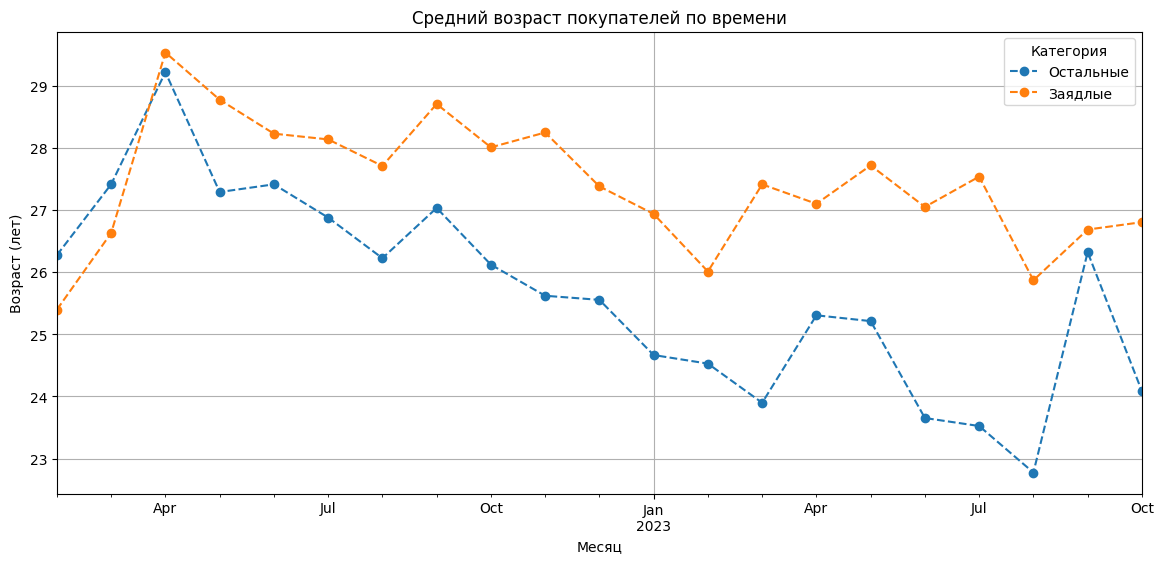

In [29]:
age_over_time = df.groupby(['year_month', is_hardcore])['age'].mean().unstack()
age_over_time.columns = ['Остальные', 'Заядлые']

fig, ax = plt.subplots(figsize=(14, 6))
age_over_time.plot(marker='o', linestyle='--', ax=ax, title='Средний возраст покупателей по времени', ylabel='Возраст (лет)', xlabel='Месяц', grid=True)
ax.legend(title='Категория')
plt.show()

Средний возраст заядлых покупателей почти на всём временном промежутке выше возраста остальных.

Для 3го пункта применим RFM анализ, там время заказа товара играет важную роль. C помощью него мы выделим нужные нам сегменты. Используем пятибальную шкалу для разметки показателей, так как данных много.

Для RFM-анализа потребуются:
- Recency: Дата последней покупки каждого клиента.
- Frequency: Количество покупок за период.
- Monetary: Общая сумма, потраченная клиентом.

In [30]:
df['order_sum'] = df['good_price'] * df['good_cnt']


rfm_by_category = {}
for category, group in df.groupby('category_name'):
    group = group.copy()
    snapshot_date = group['order_day'].max() + pd.Timedelta(days=1)

    rfm = group.groupby('client_id').agg({
        'order_day': lambda x: (snapshot_date - x.max()).days,
        'client_id': 'count',
        'order_sum': 'sum'
    }).rename(columns={
        'order_day': 'Recency',
        'client_id': 'Frequency',
        'order_sum': 'Monetary'
    })

    def safe_qcut(series, q=5, labels=None):
        try:
            return pd.qcut(series, q=q, labels=labels, duplicates='drop')
        except ValueError:
            return pd.cut(series, bins=q, labels=labels)

    rfm['R_score'] = safe_qcut(rfm['Recency'], q=5, labels=[5, 4, 3, 2, 1])
    rfm['F_score'] = safe_qcut(rfm['Frequency'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])
    rfm['M_score'] = safe_qcut(rfm['Monetary'], q=5, labels=[1, 2, 3, 4, 5])

    rfm['RFM_Segment'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)
    rfm['RFM_Score'] = rfm[['R_score', 'F_score', 'M_score']].astype(int).sum(axis=1)

    rfm_by_category[category] = rfm

Мы сделали RFM анализ по каждому клиенту, но нам надо посмотреть в целом по всем. Тогда считаем средние значение метрик по категориям, чтобы сравнить аудиторию разных категорий.

In [31]:
category_stats = []

for category, rfm in rfm_by_category.items():
    category_stats.append({
        'category_name': category,
        'avg_recency': rfm['Recency'].mean(),
        'avg_frequency': rfm['Frequency'].mean(),
        'avg_monetary': rfm['Monetary'].mean()
    })

category_rfm_summary = pd.DataFrame(category_stats)
summary = category_rfm_summary.sort_values(by='avg_monetary', ascending=False)
summary

,category_name,avg_recency,avg_frequency,avg_monetary
10,Карты оплаты,40.730769,2.076923,5294.503077
14,Предзаказы,9.731707,1.048780,2539.167317
7,Другое,167.286624,1.229299,2095.530127
2,Xbox подписка,145.600877,1.245614,1980.879386
12,Новинки,133.229268,1.046341,1896.767683
4,Бестселлеры,201.716236,1.122588,1501.467792
24,Экшн,265.492422,1.409027,1168.897877
16,Ролевые (RPG),295.703343,1.355242,1104.673937
21,Файтинги,229.828333,1.140000,897.340650
20,Стратегии,317.189986,1.678023,748.423730


Как теперь интерпретировать результаты?

- Recency (R) - **чем меньше, тем лучше**, то есть смотрим покупали ли товар недавно.
- Frequency (F) - **чем больше, тем лучше**. Понятно, что важна высокая регулярность.
- Monetary (M) - **чем больше, тем лучше**. Клиенты приносят больше денег.

In [32]:
summary.describe()

,avg_recency,avg_frequency,avg_monetary
count,25.000000,25.000000,25.000000
mean,237.387411,1.242498,1015.640234
std,83.517377,0.236320,1115.170308
min,9.731707,1.023474,64.272254
25%,226.111111,1.104178,370.317222
50%,257.988189,1.143498,579.601580
75%,283.928198,1.355242,1168.897877
max,361.481221,2.076923,5294.503077


In [33]:
new_time = pd.get_dummies(summary, columns=['category_name'])
new_time.corr(numeric_only=True).head(3)

,avg_recency,avg_frequency,avg_monetary,category_name_Anime,category_name_VR,category_name_Xbox подписка,category_name_Аркады,category_name_Бестселлеры,category_name_Гонки,category_name_Для детей,...,category_name_Приключения,category_name_Ролевые (RPG),category_name_Симуляторы,category_name_Скидки,category_name_Спорт,category_name_Стратегии,category_name_Файтинги,category_name_Хоррор,category_name_Шутеры,category_name_Экшн
avg_recency,1.000000,-0.194042,-0.818076,-0.027209,0.309551,-0.228961,0.051388,-0.088981,0.042232,0.137249,...,0.064947,0.145469,0.163140,0.116096,0.058696,0.199067,-0.018856,0.115155,0.014867,0.070108
avg_frequency,-0.194042,1.000000,0.577023,-0.087276,-0.193086,0.002747,-0.120070,-0.105710,-0.050305,-0.141815,...,0.132093,0.099392,0.183212,0.012164,-0.169702,0.383947,-0.090360,-0.092924,-0.121940,0.146807
avg_monetary,-0.818076,0.577023,1.000000,-0.112936,-0.177732,0.180324,-0.145588,0.090761,-0.157140,-0.130003,...,-0.053528,0.016633,-0.081460,-0.072372,-0.084991,-0.049921,-0.022100,-0.109176,-0.087706,0.028631


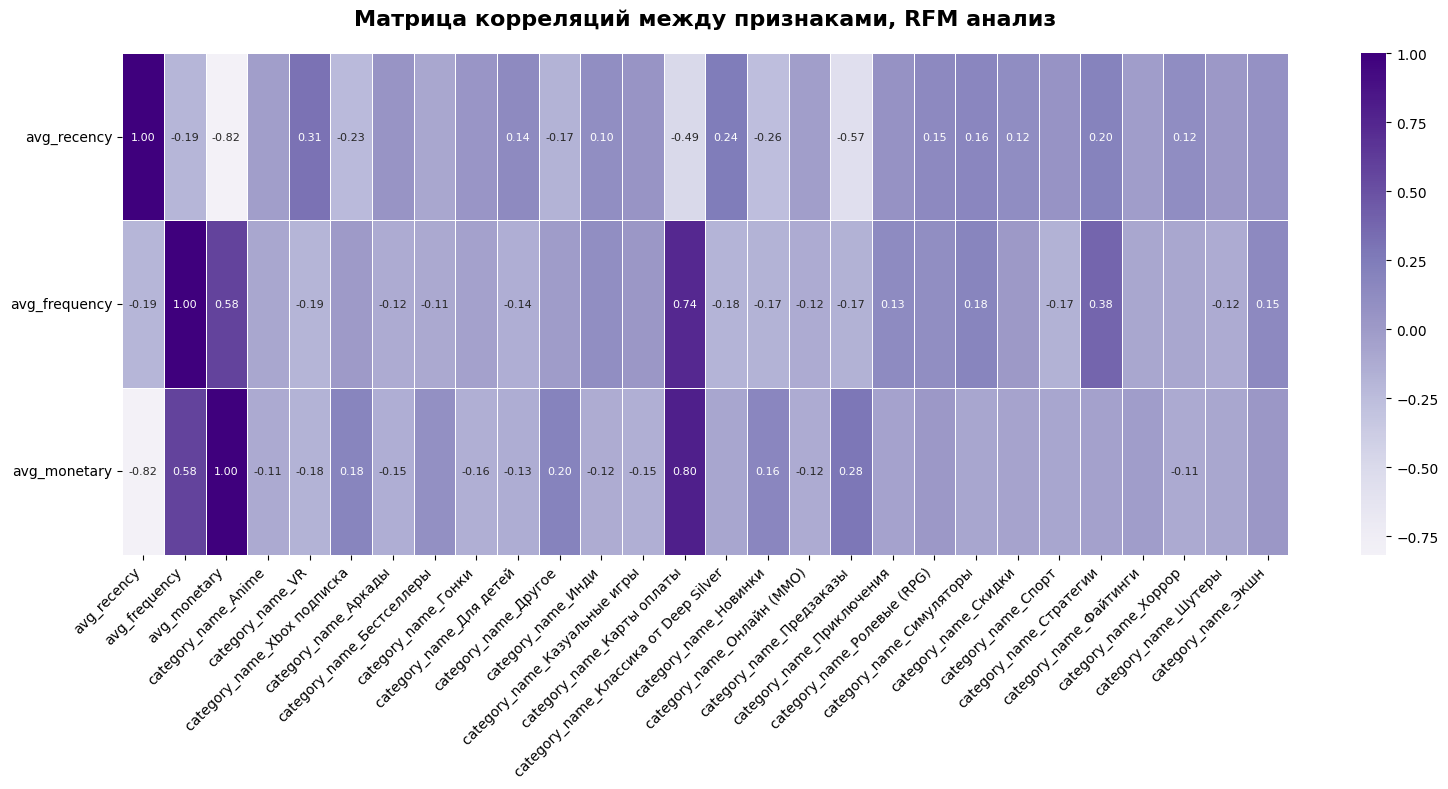

In [34]:
new_train = pd.get_dummies(summary, columns=['category_name'])
corr_matrix = new_time.corr(numeric_only=True).head(5)

plt.figure(figsize=(16, 8), dpi=100)
corr_subset = corr_matrix.iloc[:3, :]
labels = corr_subset.applymap(lambda a: f"{a:.2f}" if abs(a) >= 0.1 else "")
labels_subset = labels.iloc[:3, :]
sns.heatmap(corr_subset, cmap='Purples', center=0, annot=labels_subset, fmt="", linewidths=0.5, annot_kws={"size": 8})
plt.title('Матрица корреляций между признаками, RFM анализ', fontsize=16, pad=20, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

У Monetary и Recenty сильная обратная зависимость равная -0,82, значит чем больше одно, тем меньше другое и наоборот. А между Monetary и Frequency прямая средняя корреляция (= 0,58), между Frequency и Recenty обратная и слабая.

Значения умеренной корреляции (0,3 <= and < 0,5):

- category_name_VR и avg_recenty ("+")
- category_name_Карты оплаты и avg_recency ("-")
- category_name_Стратегии и avg_frequency ("+")

Значения средней корреляции (0,5 <= and < 0,7):
- .category_name_Предзаказы и avg_recency ("-")

Значения сильной корреляции (> 0,7):
- category_name_Карты оплаты и avg_frequency ("+")
- category_name_Карты оплаты и avg_monetary ("+")
  



// разделение на группы

###**Решение задачи 2**

#####**Исследование текущих схем выставления цены и их эффективности**

Построим диаграмму boxplot для анализа распределения цен.

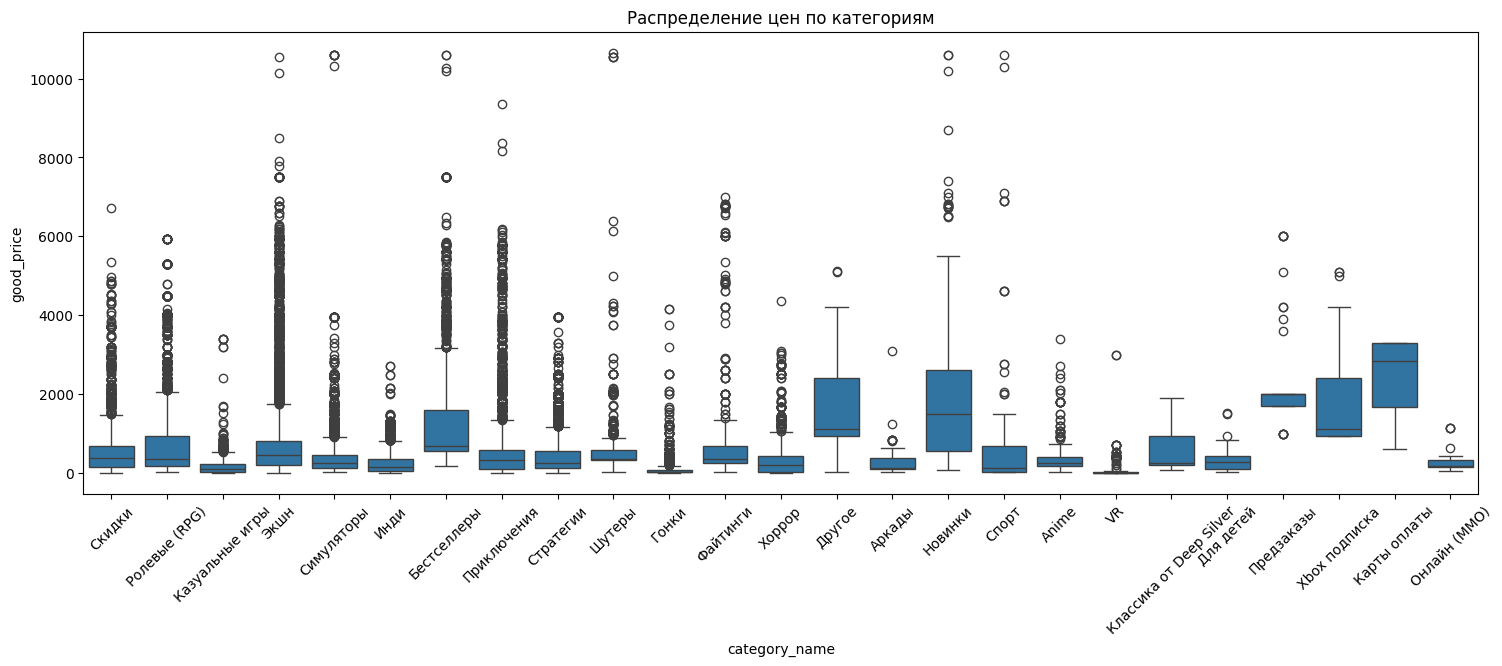

In [35]:
plt.figure(figsize=(18, 6))
sns.boxplot(data=df, x='category_name', y='good_price')
plt.xticks(rotation=45)
plt.title('Распределение цен по категориям')
plt.show()

Чтобы делать какие-то выводы по ценой политике требуется почистить данные от выбросов. Зададим границы для категорий с помощью перцентилей.

In [36]:
def remove_outliers_by_percentiles(df, lower_pct=5, upper_pct=95):
    mask = pd.Series(False, index=df.index)

    for category, group in df.groupby('category_name'):
        prices = group['good_price']
        lower_bound = np.percentile(prices, lower_pct)
        upper_bound = np.percentile(prices, upper_pct)

        category_mask = (df['category_name'] == category) & (df['good_price'] >= lower_bound) & (df['good_price'] <= upper_bound)
        mask |= category_mask

    return df[mask].copy()

filtered_df = remove_outliers_by_percentiles(df, lower_pct=5, upper_pct=95)

Для того чтобы понять насколько эффективна ценовая политика, нужно узнать как сильно зависит спрос от изменения цены.

In [37]:
grouped = filtered_df.groupby(['category_name', 'year_month']).agg(
    avg_price=('good_price', 'mean'),
    total_sales=('good_cnt', 'sum')
).reset_index()

grouped = grouped.sort_values(by=['category_name', 'year_month'])
grouped['price_change_pct'] = grouped.groupby('category_name')['avg_price'].pct_change()
grouped['sales_change_pct'] = grouped.groupby('category_name')['total_sales'].pct_change()
grouped['price_elasticity'] = grouped['sales_change_pct'] / grouped['price_change_pct']

grouped_clean = grouped.dropna(subset=['price_elasticity'])
elasticity_by_category = grouped_clean.groupby('category_name')['price_elasticity'].mean().reset_index()
elasticity_by_category = elasticity_by_category.rename(columns={'price_elasticity': 'avg_price_elasticity'})
elasticity_by_category

,category_name,avg_price_elasticity
0,Anime,-3.744796
1,VR,3.788348
2,Xbox подписка,-10.672739
3,Аркады,-7.736583
4,Бестселлеры,-1.113627
5,Гонки,-0.040806
6,Для детей,-1.243888
7,Другое,-5.500710
8,Инди,22.128351
9,Казуальные игры,-56.659571


Если эластичность по модулю больше единицы, то спрос будет чувствительным. Если меньше единицы, то чувсвительность слабая. Рассмотрим разделение категорий.

**Стабильные категории (спрос слабо зависит от цены)**:

- Гонки (–0.04)
- Ролевые (RPG) (–0.38)
- Бестселлеры (–1.11)
- Для детей (–1.24)
- Спорт (–1.07)
- Классика от Deep Silver (0.26)
- Карты оплаты (0.65)
- Хоррор (1.55)
- Экшн (2.44)

На эти категории можно повышать цену — спрос не просядет сильно.

**Чувствительные категории (спрос сильно падает при росте цены)**:

- Казуальные игры (–56.66)
- Приключения (–28.19)
- Файтинги (–22.49)
- Аркады (–7.74)
- Скидки (–7.49)
- Другое (–5.50)
- Шутеры (–4.15)
- Anime (–3.74)
- Новинки (–3.66)
- Xbox подписка (–10.67)

Цена оказывает сильное влияние и нужно быть осторожным с повышением, иначе можно потерять в прибыли.

**Аномальные категории**:

- Инди (22.13)
- Симуляторы (126.08)
- Стратегии (9.53)
- VR (3.79)

Возможно, пользователи воспринимают эти игры как уникальные или престижные.

**Ошибка**:

- Онлайн (MMO) - бесконечность.

Но стоит учитывать также дополнительные факторы, которые могут влиять на эластичность. Такие как, сезонность, наличие скидки, доход потребители или уровень образования.

In [38]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

df['month'] = df['order_day'].dt.month
df['dayofweek'] = df['order_day'].dt.weekday

df['income_category'] = pd.cut(df['monthly_income_amt'], bins=[0, 50000, 100000, 150000, 200000, float('inf')], labels=['Low', 'Medium', 'High', 'Very High', 'Super High'])

df_aggregated = df.groupby(['category_name', 'month', 'income_category']).agg(
    total_sales=('good_cnt', 'sum'),
    avg_price=('good_price', 'mean'),
    avg_income=('monthly_income_amt', 'mean')
).reset_index()

model = smf.ols('total_sales ~ avg_price + avg_income + C(category_name) + C(month) + C(income_category)', data=df_aggregated).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            total_sales   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     102.2
Date:                Thu, 31 Jul 2025   Prob (F-statistic):               0.00
Time:                        18:49:53   Log-Likelihood:                -6622.2
No. Observations:                1257   AIC:                         1.333e+04
Df Residuals:                    1215   BIC:                         1.354e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

Итого:

1. Сезонность:
  
  Месяцы с высоким спросом: апрель, май, июнь, сентябрь.
  
  Ноябрь и март незначительно влияют на спрос.

2. Доход клиента:

  С увеличением дохода клиента спрос снижается (все категории дохода значимо влияют).

3. Цена товара:

  Цена не влияет на спрос (p-value = 0.590).

4. Доход клиента (вторичная переменная):

  Не влияет на спрос (p-value = 0.901).